# Understanding Positional Embedding: A Key Concept in Transformer Models

In recent years, transformer models have revolutionized the field of natural language processing (NLP), powering state-of-the-art systems like GPT-3, BERT, and T5. One key component that makes transformers so powerful is their ability to **capture long-range dependencies** in text data, unlike traditional models like RNNs and LSTMs.

But how do transformer models handle sequences of words or tokens, given that they don't process data in a sequential manner like RNNs? The answer lies in **positional embeddings**—a crucial concept that helps transformers retain the order of words in a sequence.

In this blog, we will explore what **positional embeddings** are, why they are needed, and how they are implemented in transformer models. Let's dive in!

## What Are Positional Embeddings?

To understand positional embeddings, let’s first explore the core problem that transformers solve.

Unlike RNNs or LSTMs, transformers process input sequences in parallel rather than sequentially. This parallel processing is one of the key features that makes transformers faster and more efficient during training. However, the downside is that transformers **lack an inherent understanding of the order of tokens** in a sequence because they do not process tokens one by one.

For example, consider the sentence:
**“The cat sat on the mat.”**

If a transformer processes the words "The", "cat", "sat", "on", "the", and "mat" all at once, it doesn’t know which word comes first, second, or last. This is where positional embeddings come in.

**Positional embeddings** are a way of encoding the **position** of each token in a sequence and adding this information to the token embeddings. This allows the model to know the order of the tokens, even though it processes them in parallel.


## Why Are Positional Embeddings Important?

In traditional **sequence models** (like RNNs and LSTMs), the order of tokens is implicitly captured during the step-by-step processing of input data. For instance, in an RNN, the output at each time step is influenced by both the previous token and the current token, inherently encoding the sequence order.

However, transformers don’t have this sequential structure. The attention mechanism, which forms the backbone of the transformer model, allows tokens to attend to all other tokens in the sequence simultaneously, without considering their position. This means that **without positional information**, a transformer would treat every token as if it were the same and would lose the crucial sequential information that defines language.

To address this, positional embeddings are added to the input token embeddings, effectively giving the model the ability to "sense" the position of words within the sequence.


## How Are Positional Embeddings Implemented?

There are a few different ways to incorporate positional information into transformer models, but the most widely used method is sinusoidal positional embeddings, as introduced in the original transformer paper, "Attention Is All You Need".

### Sinusoidal Positional Embeddings

Sinusoidal positional embeddings use ***sine and cosine functions*** to encode the position of each token in a sequence. The idea is to create a unique, continuous encoding for each position in a way that allows the model to easily compare positions relative to each other.

Here’s the mathematical formulation used for sinusoidal positional embeddings:

For each position *i* and each dimension *d* of the positional embedding:


$$
PE_{(i, 2d)} = \sin\left(\frac{i}{10000^{2d/d_{\text{model}}}}\right)
$$

$$
PE_{(i, 2d+1)} = \cos\left(\frac{i}{10000^{2d/d_{\text{model}}}}\right)
$$

Where:

- *i* is the position of the token in the sequence (0-indexed)
- *d* is the dimension of the embedding,
- *d<sub>model</sub>* is the total number of dimensions in the positional embedding (same as the model’s embedding size).


### Why Sinusoidal Functions?

The use of **sine and cosine functions** ensures that each position is represented by a unique embedding that varies smoothly with the token’s position. Additionally, the periodic nature of sine and cosine functions ensures that the positional embeddings capture both short-range and long-range dependencies. The relationship between positions is encoded in such a way that the model can easily compute the relative distance between tokens.

For example, the positional embedding for a word at position 1 will have a different value from that of a word at position 2, and so on, with the cosine and sine functions ensuring that the differences are meaningful to the model.


## How Positional Embeddings Are Used in the Transformer Model

In the transformer model, positional embeddings are added to the input word embeddings at the very beginning of the model’s architecture. The final input to the model at each time step is the sum of the word embedding and the positional embedding:
$$
Input(t)=\text {Word Embedding}(t)+ \text {Positional Embedding}(t)
$$
This combined representation is then passed through the multi-head attention layers, where each token can attend to all other tokens in the sequence, with both its content (word embedding) and position (positional embedding) taken into account.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


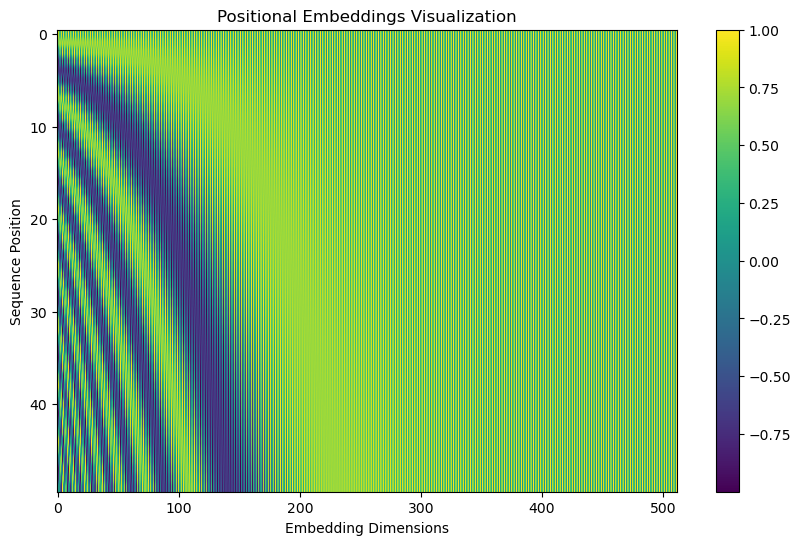

Shape of Positional Embeddings: (50, 512)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def get_positional_embeddings(seq_len, d_model):
    """
    Generate sinusoidal positional embeddings.
    
    Parameters:
    - seq_len: Length of the input sequence.
    - d_model: Dimensionality of the embeddings (typically equal to the model size).
    
    Returns:
    - pos_embeds: A numpy array of shape (seq_len, d_model) representing positional embeddings.
    """
    pos = np.arange(seq_len)[:, np.newaxis]  # Shape: (seq_len, 1)
    #div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))  # Shape: (d_model // 2,)
    div_term = np.power(10000, -np.arange(0, d_model, 2) / d_model)
    
    # Apply the sinusoidal functions
    pos_embeds = np.zeros((seq_len, d_model))  # Shape: (seq_len, d_model)
    
    # Even dimensions use sine, odd dimensions use cosine
    pos_embeds[:, 0::2] = np.sin(pos * div_term)  # Apply sin to even indices
    pos_embeds[:, 1::2] = np.cos(pos * div_term)  # Apply cos to odd indices
    
    return pos_embeds

def plot_positional_embeddings(pos_embeds):
    """
    Visualize the positional embeddings using a heatmap.
    
    Parameters:
    - pos_embeds: The positional embeddings (numpy array).
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(pos_embeds, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.xlabel('Embedding Dimensions')
    plt.ylabel('Sequence Position')
    plt.title('Positional Embeddings Visualization')
    plt.show()

# Parameters
seq_len = 50    # Length of the input sequence
d_model = 512   # Dimensionality of the embedding space

# Generate positional embeddings
pos_embeds = get_positional_embeddings(seq_len, d_model)

# Plot the positional embeddings
plot_positional_embeddings(pos_embeds)

# Display the shape of the positional embeddings
print(f"Shape of Positional Embeddings: {pos_embeds.shape}")


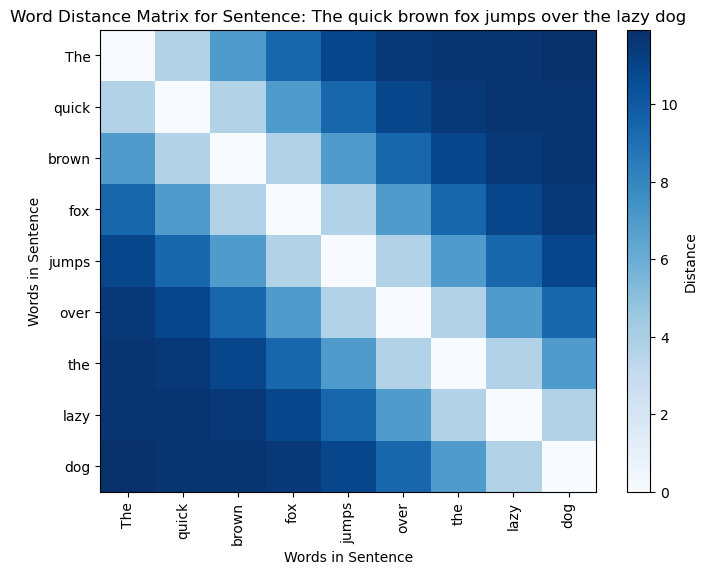

In [2]:
# Example through a sentence
# Sentence: "The quick brown fox jumps over the lazy dog"
sentence = "The quick brown fox jumps over the lazy dog".split()

# Number of words
seq_len = len(sentence)
d_model = 512
pos_embeds = get_positional_embeddings(seq_len,d_model)
# Compute distance matrix between all pairs of positional embeddings
# Using Euclidean distance between embeddings of different positions
dist_matrix = cdist(pos_embeds, pos_embeds, metric='euclidean')


# Plotting the distance matrix
plt.figure(figsize=(8, 6))
plt.imshow(dist_matrix, cmap='Blues', aspect='auto')  # Heatmap to show distances
plt.colorbar(label='Distance')
plt.xticks(np.arange(seq_len), sentence, rotation=90)  # Word labels on the x-axis
plt.yticks(np.arange(seq_len), sentence)  # Word labels on the y-axis
plt.xlabel('Words in Sentence')
plt.ylabel('Words in Sentence')
plt.title(f'Word Distance Matrix for Sentence: {" ".join(sentence)}')
plt.show()